In [1]:
import pandas as pd
pd.set_option('max_columns', 25)
pd.set_option('max_rows', 1000)
import numpy as np
from sklearn.cluster import k_means, KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing

In [2]:
# Load Data
raw_data = pd.read_csv("Dataset.csv")
raw_data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274.0,Suburban,Married,69.0,32.0,5.0,0.0,1.0,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0.0,Suburban,Single,94.0,13.0,42.0,0.0,8.0,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767.0,Suburban,Married,108.0,18.0,38.0,0.0,2.0,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0.0,Suburban,Married,106.0,18.0,65.0,0.0,7.0,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,02/03/11,Employed,M,43836.0,Rural,Single,73.0,12.0,44.0,0.0,1.0,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8289,TQ82322,California,2438.689804,No,Basic,Bachelor,2/19/11,Employed,F,80927.0,Urban,Single,62.0,25.0,8.0,0.0,1.0,Personal Auto,Personal L2,Offer2,Branch,211.660971,Two-Door Car,Medsize
8290,CB77819,California,4736.347990,No,Basic,High School or Below,02/10/11,Unemployed,M,0.0,Suburban,Single,65.0,33.0,1.0,0.0,3.0,Personal Auto,Personal L3,Offer1,Web,585.454243,Two-Door Car,Medsize
8291,VG68427,Arizona,5608.155723,No,Basic,High School or Below,2/17/11,Employed,M,81914.0,Urban,Married,70.0,6.0,33.0,0.0,6.0,Corporate Auto,Corporate L2,Offer4,Branch,198.754660,Four-Door Car,Medsize
8292,WO42164,Oregon,6465.223746,No,Extended,High School or Below,02/07/11,Unemployed,M,0.0,Suburban,Single,92.0,9.0,24.0,0.0,3.0,Personal Auto,Personal L3,Offer1,Call Center,662.400000,Four-Door Car,Medsize


## Missing value analysis

In [3]:
# Sum of Null values in each column
raw_data.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 1
Gender                           1
Income                           1
Location Code                    1
Marital Status                   1
Monthly Premium Auto             1
Months Since Last Claim          1
Months Since Policy Inception    1
Number of Open Complaints        1
Number of Policies               1
Policy Type                      1
Policy                           1
Renew Offer Type                 1
Sales Channel                    1
Total Claim Amount               1
Vehicle Class                    1
Vehicle Size                     1
dtype: int64

In [4]:
raw_data.shape

(8294, 24)

In [5]:
# Number of rows having NULL values
raw_data.shape[0] - raw_data.dropna().shape[0]

1

Since only 1 row has missing values, we will delete the row.

In [6]:
# Drop rows having NULL values
data = raw_data.dropna()
data.shape

(8293, 24)

In [7]:
# Make a copy of the data and then proceed.
data1 = data.copy()

# Delete Unwanted Columns
del data1['Customer']
del data1['Effective To Date']

In [8]:
data1

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274.0,Suburban,Married,69.0,32.0,5.0,0.0,1.0,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0.0,Suburban,Single,94.0,13.0,42.0,0.0,8.0,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767.0,Suburban,Married,108.0,18.0,38.0,0.0,2.0,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0.0,Suburban,Married,106.0,18.0,65.0,0.0,7.0,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836.0,Rural,Single,73.0,12.0,44.0,0.0,1.0,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8288,Oregon,8804.584902,No,Basic,Bachelor,Employed,M,38638.0,Suburban,Married,74.0,5.0,84.0,0.0,2.0,Personal Auto,Personal L2,Offer1,Agent,355.200000,Four-Door Car,Medsize
8289,California,2438.689804,No,Basic,Bachelor,Employed,F,80927.0,Urban,Single,62.0,25.0,8.0,0.0,1.0,Personal Auto,Personal L2,Offer2,Branch,211.660971,Two-Door Car,Medsize
8290,California,4736.347990,No,Basic,High School or Below,Unemployed,M,0.0,Suburban,Single,65.0,33.0,1.0,0.0,3.0,Personal Auto,Personal L3,Offer1,Web,585.454243,Two-Door Car,Medsize
8291,Arizona,5608.155723,No,Basic,High School or Below,Employed,M,81914.0,Urban,Married,70.0,6.0,33.0,0.0,6.0,Corporate Auto,Corporate L2,Offer4,Branch,198.754660,Four-Door Car,Medsize


In [9]:
# All Columns in data
columns = data1.columns
columns

Index(['State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [10]:
# Columns having Numerical values
numerical_columns = data1._get_numeric_data().columns
numerical_columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

In [11]:
# Columns having Categorical values
categorical_columns = list(set(columns) - set(numerical_columns))
categorical_columns

['Response',
 'Gender',
 'Location Code',
 'Sales Channel',
 'Coverage',
 'EmploymentStatus',
 'Education',
 'Vehicle Class',
 'Vehicle Size',
 'State',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type']

In [12]:
# All Unique Values in Categorical Columns
for column in categorical_columns:
    print(column ,':', data1[column].nunique())
    print(data1[column].unique())

Response : 2
['No' 'Yes']
Gender : 2
['F' 'M']
Location Code : 3
['Suburban' 'Rural' 'Urban']
Sales Channel : 4
['Agent' 'Call Center' 'Web' 'Branch']
Coverage : 3
['Basic' 'Extended' 'Premium']
EmploymentStatus : 5
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
Education : 5
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Vehicle Class : 6
['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
Vehicle Size : 3
['Medsize' 'Small' 'Large']
State : 5
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
Marital Status : 3
['Married' 'Single' 'Divorced']
Policy Type : 3
['Corporate Auto' 'Personal Auto' 'Special Auto']
Policy : 9
['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
Renew Offer Type : 4
['Offer1' 'Offer3' 'Offer2' 'Offer4']


## Outlier analysis

### Removing Outliers using Box-plot

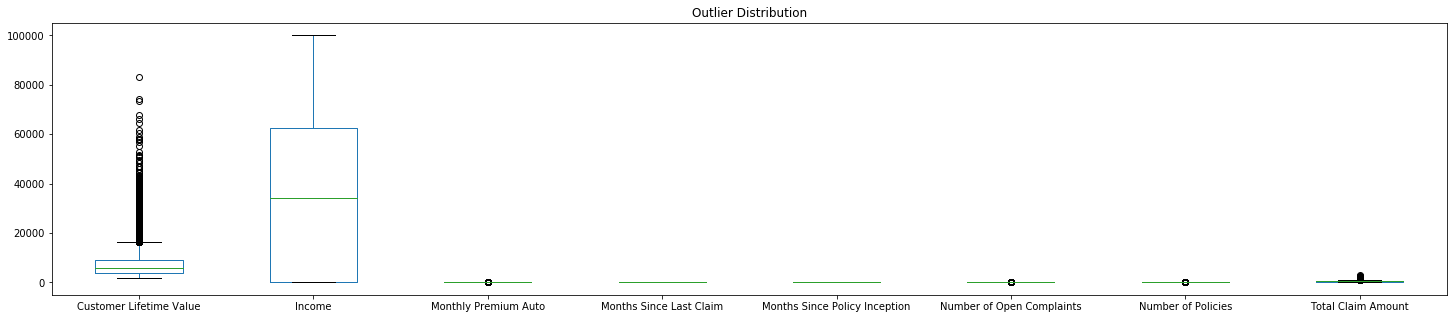

In [13]:
data1[['Customer Lifetime Value','Income','Monthly Premium Auto','Months Since Last Claim'
       ,'Months Since Policy Inception','Number of Open Complaints', 'Number of Policies'
       ,'Total Claim Amount']].plot.box(figsize = (25, 5), legend = True, title = 'Outlier Distribution')

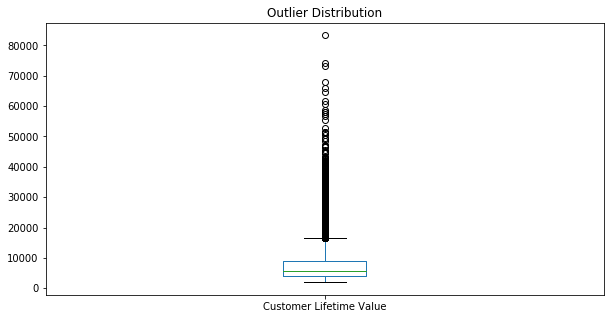

In [14]:
data1[['Customer Lifetime Value']].plot.box(figsize = (10, 5), legend = True, title = 'Outlier Distribution')

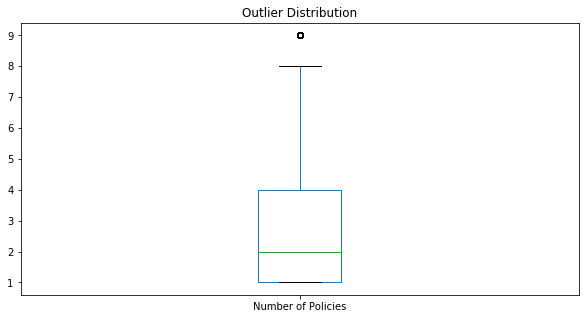

In [15]:
data1[['Number of Policies']].plot.box(figsize = (10, 5), legend = True, title = 'Outlier Distribution')

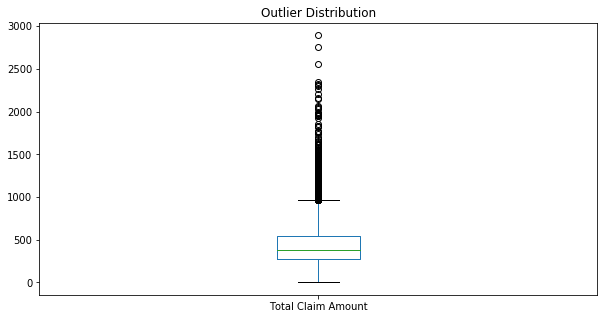

In [16]:
data1[['Total Claim Amount']].plot.box(figsize = (10, 5), legend = True, title = 'Outlier Distribution')

In [17]:
def removeOutliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 

    filter = (df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))
    return df.loc[filter] 

In [18]:
data2 = data1.copy()

In [19]:
data2 = removeOutliers(data2, 'Customer Lifetime Value')
data2.shape

(7560, 22)

In [20]:
data2 = removeOutliers(data2, 'Number of Policies')
data2.shape

(7182, 22)

In [21]:
data2 = removeOutliers(data2, 'Total Claim Amount')
data2.shape

(6871, 22)

Removing Outliers using box-plot removes 8293-6871 = 1422 rows.

### Removing outliers using z-score

In [22]:
z_scores = stats.zscore(data1[numerical_columns])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data3 = data1[filtered_entries]
data3 = data3.reset_index(drop=True)

In [23]:
data3.shape

(7702, 22)

Removing outliers using z-score removes 8293-7702 = 591 rows.

Since, removing outliers using z-score removes less rows when compared with removing outliers using box-plot, for our convinience we proceed with x-score removal.

## Feature Selection

### Correlation Matrix

'data2' :-  Outliers removed by using box-plot method.<br>
'data3' :-  Outliers removed by using z-score.

In [24]:
data4 = data3.copy()

In [25]:
# Calculating the correlation matrix
correlation_matrix = data4[numerical_columns].corr()

# Converting the correlation matrix to dataframe
correlation_matrix = pd.DataFrame(correlation_matrix)

(8.5, -0.5)

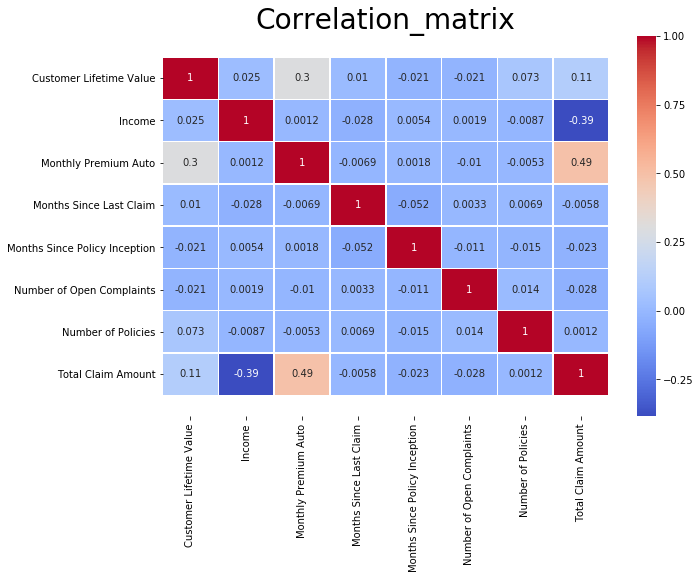

In [26]:
# Plotting HeatMap for Correlation Matrix
plt.figure(figsize = (10, 7))
ax = sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5, linecolor='w', annot=True)
plt.title('Correlation_matrix', size=28)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

There is no correlation between any two numerical variables.

### Multi-Colinearity

In [27]:
# Function to Calculaye VIF(Variance Inflation Factor)

vif = pd.DataFrame()
def calculateVIF(df):
    vif['columns'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    print(vif)
    vif.drop(vif.index, inplace=True) # drop all data in vif dataframe

In [28]:
calculateVIF(data4[numerical_columns])

                         columns        VIF
0        Customer Lifetime Value   3.472219
1                         Income   2.865513
2           Monthly Premium Auto  14.621324
3        Months Since Last Claim   2.842981
4  Months Since Policy Inception   3.365862
5      Number of Open Complaints   1.169885
6             Number of Policies   2.375957
7             Total Claim Amount   6.410366


In [29]:
data4 = data4.drop('Monthly Premium Auto', axis=1)
numerical_columns = numerical_columns.drop('Monthly Premium Auto')

In [30]:
calculateVIF(data4[numerical_columns])

                         columns       VIF
0        Customer Lifetime Value  3.025092
1                         Income  2.271456
2        Months Since Last Claim  2.725374
3  Months Since Policy Inception  3.140550
4      Number of Open Complaints  1.164079
5             Number of Policies  2.342724
6             Total Claim Amount  3.280785


In [31]:
columns = data4.columns
data4.shape

(7702, 21)

## Feature Scaling

In [32]:
# data4.hist(figsize=(18,18))
# plt.gca().axes.get_yaxis().set_visible(False) #To hide <matplotlib.axis.XTick at 0x18100167630> etc etc

In [33]:
# normalized_data = pd.DataFrame(preprocessing.normalize(data4[numerical_columns]), columns = numerical_columns)
# # standardized_data = pd.DataFrame(preprocessing.scale(data4[numerical_columns]), columns = numerical_columns)
# normalized_data

In [34]:
# data5 = pd.concat([normalized_data, data4[categorical_columns]], axis=1)
# data6 = pd.concat([standardized_data, data4[categorical_columns]], axis=1)

###### Since Standardizing or Normalizing the data is not improving the performance of the model. We will not do Feature Scaling...

In [35]:
data7 = data4.copy()

In [36]:
data8 = pd.get_dummies(data7)
data8

,Customer Lifetime Value,Income,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,56274.0,32.0,5.0,0.0,1.0,384.811147,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0,1,0
1,6979.535903,0.0,13.0,42.0,0.0,8.0,1131.464935,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0
2,12887.431650,48767.0,18.0,38.0,0.0,2.0,566.472247,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0,1,0
3,7645.861827,0.0,18.0,65.0,0.0,7.0,529.881344,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0,1,0
4,2813.692575,43836.0,12.0,44.0,0.0,1.0,138.130879,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7697,8804.584902,38638.0,5.0,84.0,0.0,2.0,355.200000,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,1,0
7698,2438.689804,80927.0,25.0,8.0,0.0,1.0,211.660971,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0,1,0
7699,4736.347990,0.0,33.0,1.0,0.0,3.0,585.454243,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0,1,0
7700,5608.155723,81914.0,6.0,33.0,0.0,6.0,198.754660,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,1,0


In [37]:
# Estimate Optimum number of clusters
cluster_range = range(2, 25)
cluster_errors = []
K = []
DB_Index = []
Silhouette = []
Calinski_Harabasz = []
Quality = pd.DataFrame(columns = ['K', 'DB-Index', 'Silhouette', 'Calinski-Harabasz'])

for noOfClusters in cluster_range:
    clusters = KMeans(n_clusters=noOfClusters).fit(data8)
    label = clusters.labels_
    cluster_errors.append(clusters.inertia_)
    K.append(noOfClusters)
    DB_Index.append(davies_bouldin_score(data8, label))
    Silhouette.append(silhouette_score(data8, label))
    Calinski_Harabasz.append(calinski_harabasz_score(data8, label))
    

    
cluster_DF = pd.DataFrame({"noOfClusters": cluster_range, "cluster_errors": cluster_errors})
cluster_DF['K'] = K
cluster_DF['DB-Index'] = DB_Index
cluster_DF['Silhouette'] = Silhouette
cluster_DF['Calinski-Harabasz'] = Calinski_Harabasz
cluster_DF

,noOfClusters,cluster_errors,K,DB-Index,Silhouette,Calinski-Harabasz
0,2,1.995651e+12,2,0.550128,0.604941,20596.047860
1,3,9.677293e+11,3,0.532559,0.578513,25322.763143
2,4,5.528648e+11,4,0.569544,0.567270,31471.480352
3,5,4.047215e+11,5,0.623110,0.539659,32943.621555
4,6,3.258271e+11,6,0.677921,0.521276,33104.765835
5,7,2.893248e+11,7,0.758354,0.482738,31225.592160
6,8,2.552850e+11,8,0.752061,0.473227,30476.243950
7,9,2.262754e+11,9,0.730161,0.478519,30205.177652
8,10,1.984632e+11,10,0.746268,0.471847,30727.122977
9,11,1.770544e+11,11,0.723870,0.480554,31087.240955


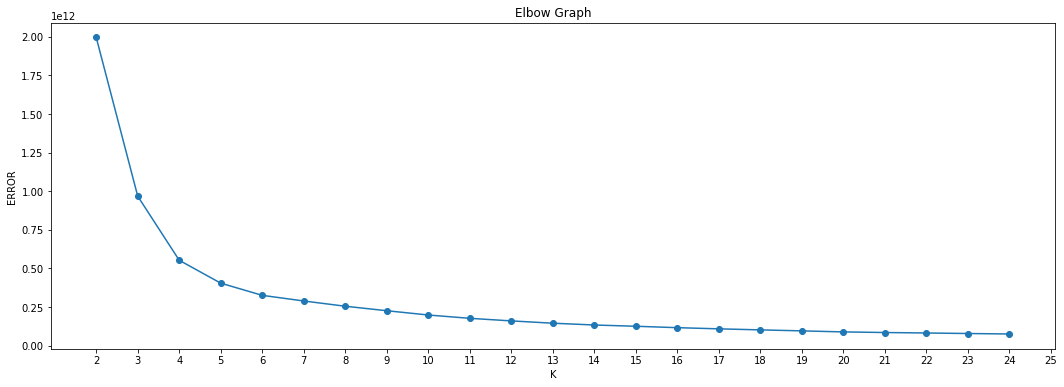

In [38]:
plt.figure(figsize=(18, 6))
plt.plot(cluster_DF.noOfClusters, cluster_DF.cluster_errors, marker = 'o')
plt.xlabel('K')
plt.ylabel('ERROR')
plt.title('Elbow Graph')
plt.xticks(np.arange(2, 26, 1))
plt.show()

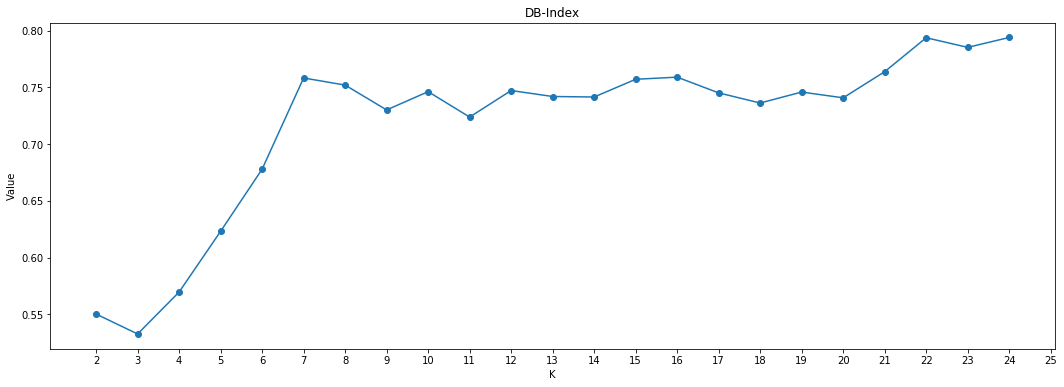

In [39]:
plt.figure(figsize=(18, 6))
plt.plot(cluster_DF.noOfClusters, cluster_DF['DB-Index'], marker = 'o')
plt.xlabel('K')
plt.ylabel('Value')
plt.title('DB-Index')
plt.xticks(np.arange(2, 26, 1))
plt.show()

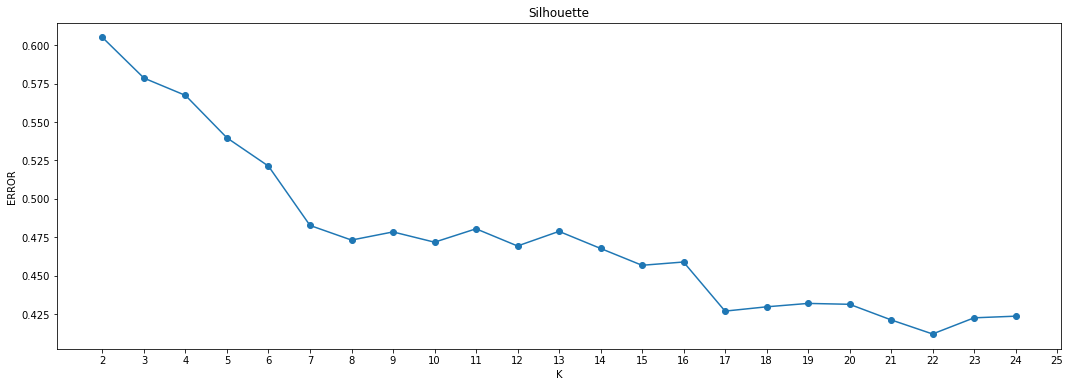

In [40]:
plt.figure(figsize=(18, 6))
plt.plot(cluster_DF.noOfClusters, cluster_DF.Silhouette, marker = 'o')
plt.xlabel('K')
plt.ylabel('ERROR')
plt.title('Silhouette')
plt.xticks(np.arange(2, 26, 1))
plt.show()

In [41]:
# Number of Clusters
n = 3

In [42]:
# Classification using K_Means 
clf = KMeans(n_clusters=n).fit(data8)

In [43]:
centroids = clf.cluster_centers_
labels = clf.labels_

## Davies Boulding Index

If the ground truth labels are not known, the Davies-Bouldin index (sklearn.metrics.davies_bouldin_score) can be used to evaluate the model, where a lower Davies-Bouldin index relates to a model with better separation between the clusters.

This index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves.

Zero is the lowest possible score. Values closer to zero indicate a better partition.

#### Advantages
1. The computation of Davies-Bouldin is simpler than that of Silhouette scores.
2. The index is computed only quantities and features inherent to the dataset.

#### Drawbacks
1. The Davies-Boulding index is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained from DBSCAN.
2. The usage of centroid distance limits the distance metric to Euclidean space.

In [44]:
# Using in-built method to calculate DB-Index
davies_bouldin_score(data8, labels)

0.5331131342313079

## Silhouette Coefficient

If the ground truth labels are not known, evaluation must be performed using the model itself. The Silhouette Coefficient (sklearn.metrics.silhouette_score) is an example of such an evaluation, where a higher Silhouette Coefficient score relates to a model with better defined clusters. 

The Silhouette Coefficient is defined for each sample and is composed of two scores:<br>
a: The mean distance between a sample and all other points in the same class.<br>
b: The mean distance between a sample and all other points in the next nearest cluster.

The Silhouette Coefficient s for a single sample is then given as:

$  s = \frac{(b-a)}{max(a, b)}  $

#### Advantages
1. The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.
2. The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

#### Drawbacks
1. The Silhouette Coefficient is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.

In [45]:
# Using in-built method to calculate Silhouette-Score
silhouette_score(data8, labels)

0.5780781063805595

## Calinski-Harabasz Score

If the ground truth labels are not known, the Calinski-Harabasz index (sklearn.metrics.calinski_harabasz_score) - also known as the Variance Ratio Criterion - can be used to evaluate the model, where a higher Calinski-Harabasz score relates to a model with better defined clusters.

The index is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared)

#### Advantages
1. The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.
2. The score is fast to compute.

#### Drawbacks
1. The Calinski-Harabasz index is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.

In [46]:
# It is also known as the Variance Ratio Criterion
calinski_harabasz_score(data8, labels)

25322.739398293725

# End